# LCMS

## Setup

In [ ]:
library(data.table)
library(ggplot2)
library(here)


here() starts at C:/Users/alosvendsen/Documents/R/manuscript

## Donor 3, AS0013B, Midazolam

### Peak status’

Check peak status’ for any amounts below what below/above the limit of our standard curve.

In [ ]:
# Load data
donor_3_peak_status <- 
  readRDS(here("notebooks/LCMS/data_processed/AS0013_peak_status.rds"))

donor_3_peak_status


   sample_name     amount  peak_status       metabolite donor     treatment
1: AS0013B_113 0.08809692 Response Low Hydroxymidazolam     3 10 ng/ml IL-6
   time_treatment time_incubation rep
1:            120             0.5   1

**Should this be omitted? It is below the lowest point on our standard curve, but omitting it would make the mean higher, than it really is? For now it is included in calculated means.**

### **Plots**

In [ ]:
# Load processed data
donor_3_data <- 
  readRDS(here("notebooks/LCMS/data_processed/AS0013.rds"))


# Create groups/look up tables for subsetting data
group_IL6 <- c(#"control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c(#"control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


IL-6 effect on CYP3A4

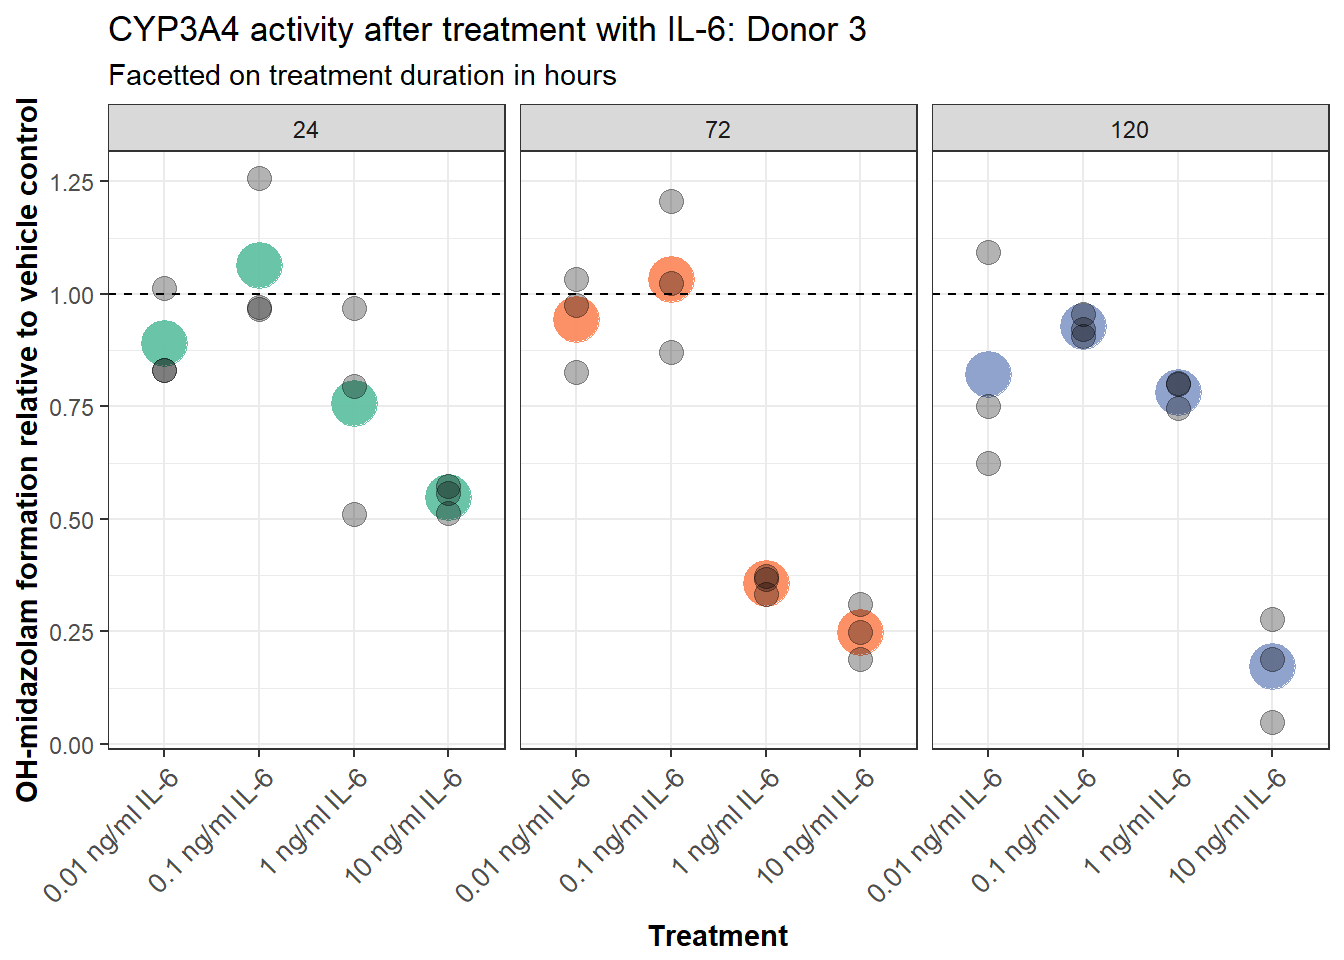

In [ ]:

plot_data <- 
  donor_3_data[time_incubation == 0.5 
               & treatment %in% group_IL6
               ]


act_3A4_IL_6_AS0013 <- 
  ggplot(data = plot_data) +
  geom_point(aes(x = treatment,
                 y = mean_relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 8,
             alpha = 0.7,
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = relative_amount
                 ),
             size = 4,
             alpha = 0.3
             ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 3, by= 0.25)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
    ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-6: Donor 3",
          subtitle = "Facetted on treatment duration in hours"
          ) +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
        )


act_3A4_IL_6_AS0013

# ggsave(
#   plot = last_plot(),
#   filename = "3A4_IL_6_AS0013.png",
#   device = "png",
#   path = here("notebooks/LCMS/output")
#   )


IL-1B effect on CYP3A4

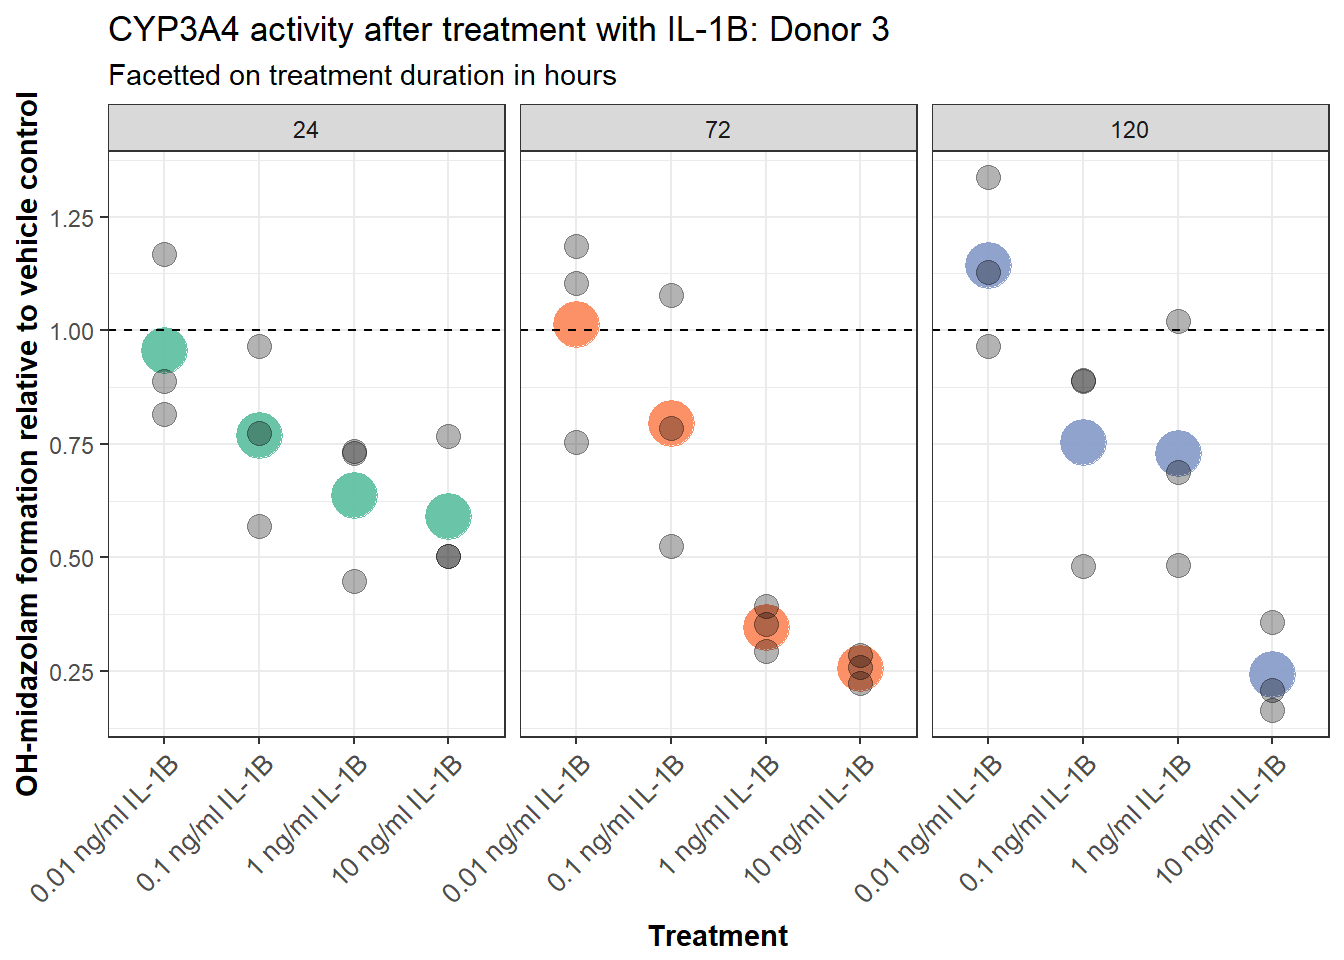

In [ ]:

plot_data <- 
  donor_3_data[time_incubation == 0.5 &
                 treatment %in% group_IL1B
               ]

act_3A4_IL_1B_AS0013 <-
  ggplot(data = plot_data) +
  geom_point(aes(x = treatment,
                 y = mean_relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 8,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = relative_amount
                 ),
             size = 4,
             alpha = 0.3
             ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 3, by= 0.25)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-1B: Donor 3",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_1B_AS0013

# ggsave(
#   plot = last_plot(),
#   filename = "3A4_IL_1B_AS0013.png",
#   device = "png",
#   path = here("notebooks/LCMS/output")
#   )


## Donor 2, AS0008, midazolam

Load data Check peak status’ for any amounts below what below/above the limit of our standard curve.

In [ ]:
donor_2_peak_status <- 
  readRDS(here("notebooks/LCMS/data_processed/AS0008_peak_status.rds"))

# Check peak status'
donor_2_peak_status |> knitr::kable()


  ------------------------------------------------------------------------------------------------------------------------
  sample_name         amount peak_status   metabolite           donor treatment   time_treatment     time_incubation   rep
  ------------- ------------ ------------- ------------------ ------- ----------- ---------------- ----------------- -----
  AS0008_135       0.9118640 Response Low  Hydroxymidazolam         2 10 ng/ml    72                             0.5     3
                                                                      IL-6                                           

  AS0008_152              NA Not Found     Hydroxymidazolam         2 1 ng/ml     72                             8.0     1
                                                                      IL-1B                                          

  AS0008_153              NA Not Found     Hydroxymidazolam         2 10 ng/ml    72                             8.0     1
                                                                      IL-1B                                          

  AS0008_162              NA Not Found     Hydroxymidazolam         2 1 ng/ml     72                             8.0     2
                                                                      IL-1B                                          

  AS0008_163              NA Not Found     Hydroxymidazolam         2 10 ng/ml    72                             8.0     2
                                                                      IL-1B                                          

  AS0008_171      -0.2901863 Response Low  Hydroxymidazolam         2 0.1 ng/ml   72                             8.0     3
                                                                      IL-1B                                          

  AS0008_172              NA Not Found     Hydroxymidazolam         2 1 ng/ml     72                             8.0     3
                                                                      IL-1B                                          

  AS0008_173              NA Not Found     Hydroxymidazolam         2 10 ng/ml    72                             8.0     3
                                                                      IL-1B                                          

  AS0008_197       0.8381536 Response Low  Hydroxymidazolam         2 10 ng/ml    120                            0.5     1
                                                                      IL-6                                           
  ------------------------------------------------------------------------------------------------------------------------


Samples 52, 153, 162, 163, 172, and 173 had no baselcocktail added to there wells, and that is why there is no peaks. Sample 171 did not have a spheroid in the well. These samples are removed from the datatable before calculating means. However, there are two samples left with “response low”, which are included in calculating means.

### **Plots**

In [ ]:
# Load processed data
donor_2_data <- 
  readRDS(here("notebooks/LCMS/data_processed/AS0008.rds"))


# Create groups/look up tables for subsetting data
group_IL6 <- c(#"control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c(#"control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


IL-6 effect on CYP3A4

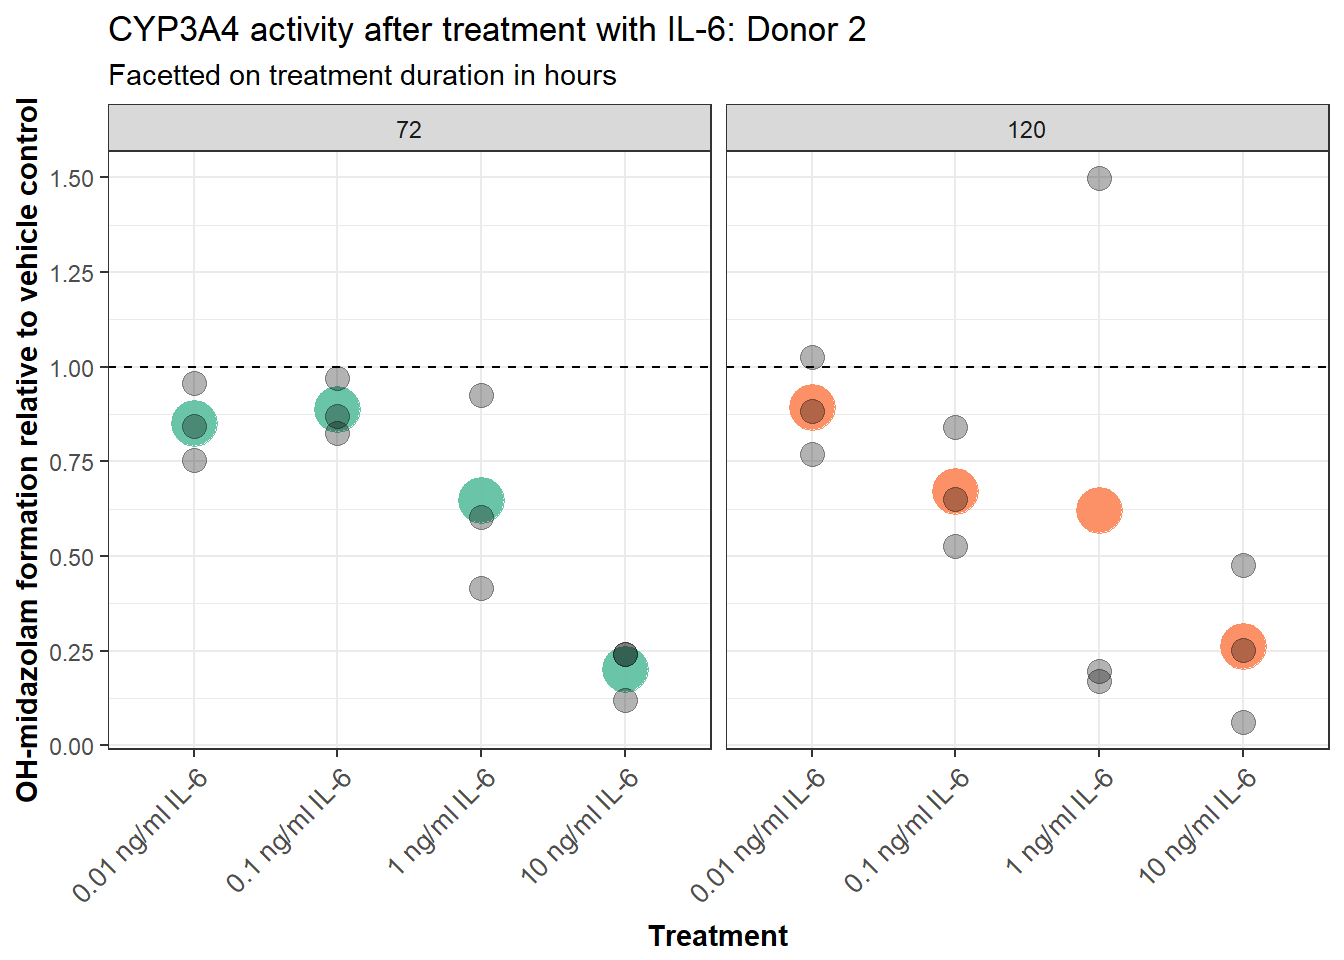

In [ ]:

plot_data <- 
  donor_2_data[time_incubation == 0.5 
               & treatment %in% group_IL6
               ]


act_3A4_IL_6_AS0008 <- 
  ggplot(data = plot_data) +
  geom_point(aes(x = treatment,
                 y = mean_relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 8,
             alpha = 0.7,
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = relative_amount
                 ),
             size = 4,
             alpha = 0.3
             ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 3, by= 0.25)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
    ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-6: Donor 2",
          subtitle = "Facetted on treatment duration in hours"
          ) +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
        )


act_3A4_IL_6_AS0008

# ggsave(
#   plot = last_plot(),
#   filename = "3A4_IL_6_AS0008.png",
#   device = "png",
#   path = here("notebooks/LCMS/output")
#   )


IL-1B effect on CYP3A4

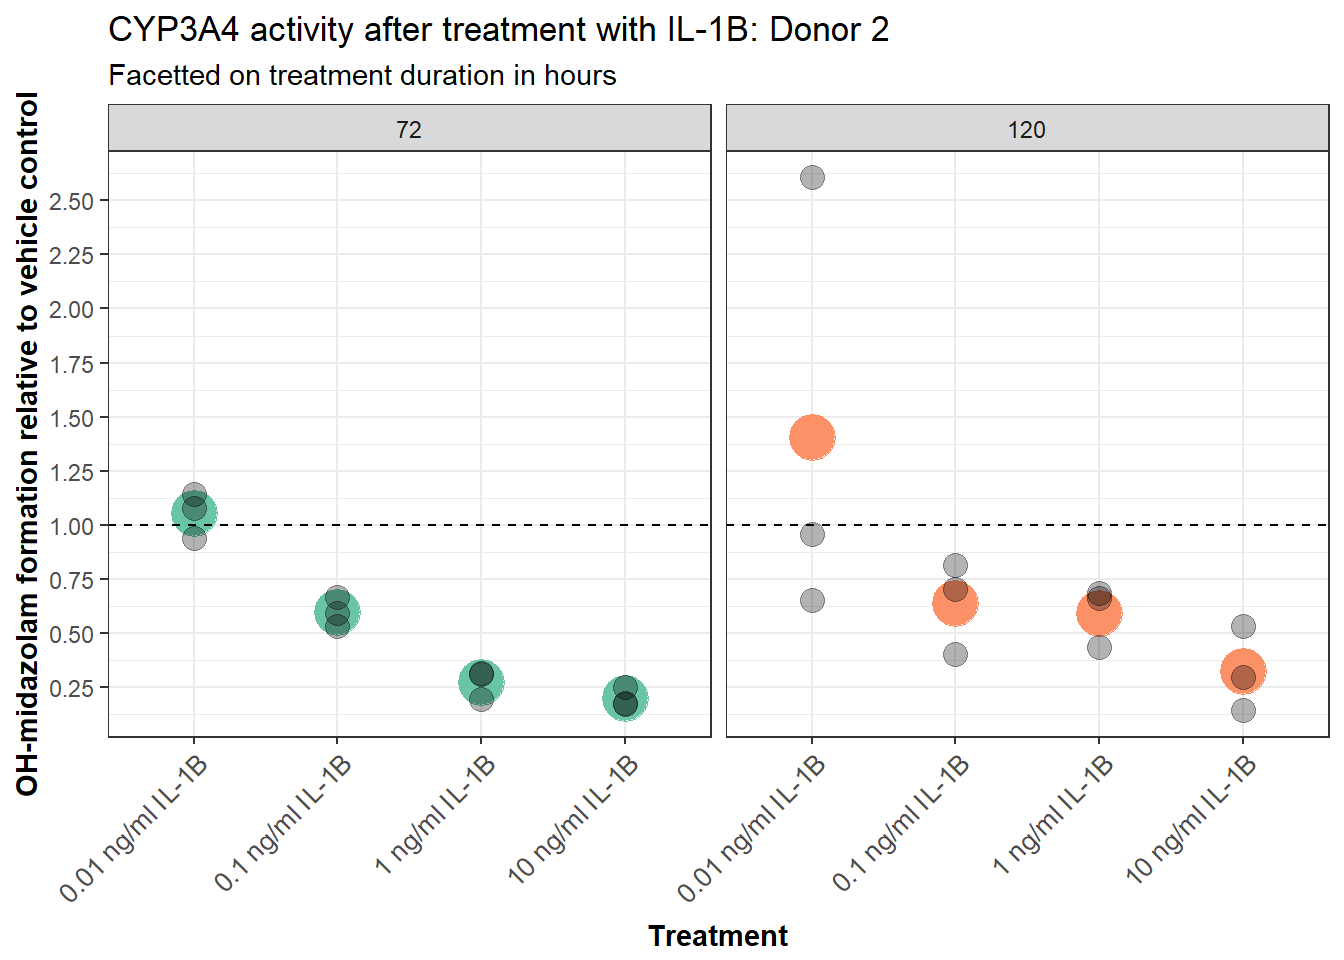

In [ ]:

plot_data <- 
  donor_2_data[time_incubation == 0.5 &
                 treatment %in% group_IL1B
               ]

act_3A4_IL_1B_AS0008 <-
  ggplot(data = plot_data) +
  geom_point(aes(x = treatment,
                 y = mean_relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 8,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = relative_amount
                 ),
             size = 4,
             alpha = 0.3
             ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  scale_y_continuous(
    name = "OH-midazolam formation relative to vehicle control", 
    breaks = seq(from = 0, to = 3, by= 0.25)
    ) +
  facet_wrap(
    facets = vars(factor(time_treatment))
  ) +
  theme_bw() +
  xlab("Treatment") + 
  ggtitle("CYP3A4 activity after treatment with IL-1B: Donor 2",
          subtitle = "Facetted on treatment duration in hours") +
  ylab("Metabolite formation relative to vehicle control") +
  theme(axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
        axis.title.x = element_text(hjust = 0.5, vjust = 0, face = "bold"),
        axis.title.y = element_text(face = "bold"),
        legend.position = "none"
  )

act_3A4_IL_1B_AS0008

# ggsave(
#   plot = last_plot(),
#   filename = "3A4_IL_1B_AS0008.png",
#   device = "png",
#   path = here("notebooks/LCMS/output")
#   )


## Main plots

load data

In [ ]:
data <- readRDS(here("notebooks/LCMS/data_processed/final_data.rds"))


In [ ]:
# Create groups/look up tables for subsetting data
group_IL6 <- c(#"control", 
               #"medium", 
               "0.01 ng/ml IL-6", 
               "0.1 ng/ml IL-6",
               "1 ng/ml IL-6", 
               "10 ng/ml IL-6"
               )

group_IL1B <- c(#"control", 
                #"medium", 
                "0.01 ng/ml IL-1B", 
                "0.1 ng/ml IL-1B",
                "1 ng/ml IL-1B",
                "10 ng/ml IL-1B"
                )


### Facetted on time

IL-6

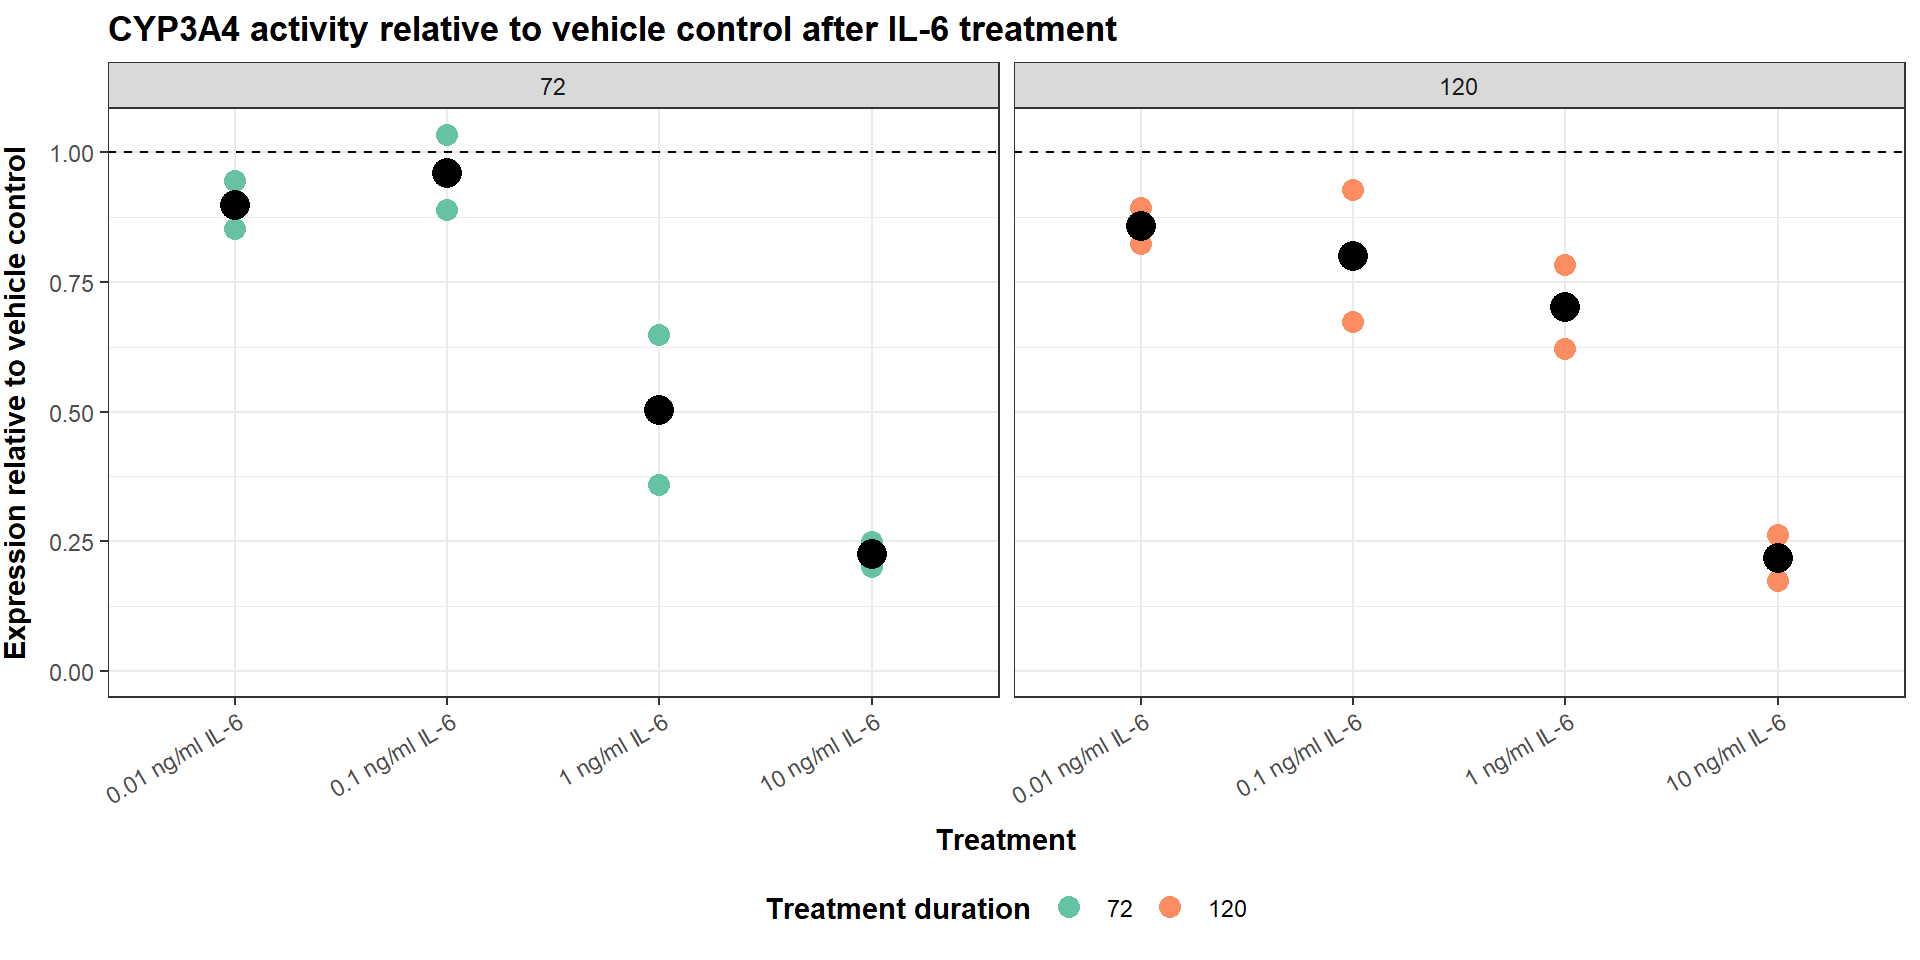

In [ ]:

plot_data_IL6 <- data[time_incubation == 0.5 
                      & treatment %in% group_IL6
                      & time_treatment != 24]


act_3A4_IL6 <- ggplot(data = plot_data_IL6) +
  geom_point(
    mapping = aes(x = treatment, y = mean_relative_amount, color = factor(time_treatment)),
    size = 3.5
  ) +
  stat_summary(
    fun = "mean",
    geom = "point",
    mapping = aes(x = treatment, y = mean_relative_amount),
    size = 5
  ) +
  scale_color_brewer(palette = "Set2") +
  facet_wrap(~ time_treatment, ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-6 treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration") + 
  scale_y_continuous(limits = c(0, NA)) +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  geom_hline(yintercept = 1, linetype = "dashed")



act_3A4_IL6


CONSIDER REMOVING THE OUTLIER IN 120 hour IL-6 and IL1B. See the individual plots above.

IL-1B

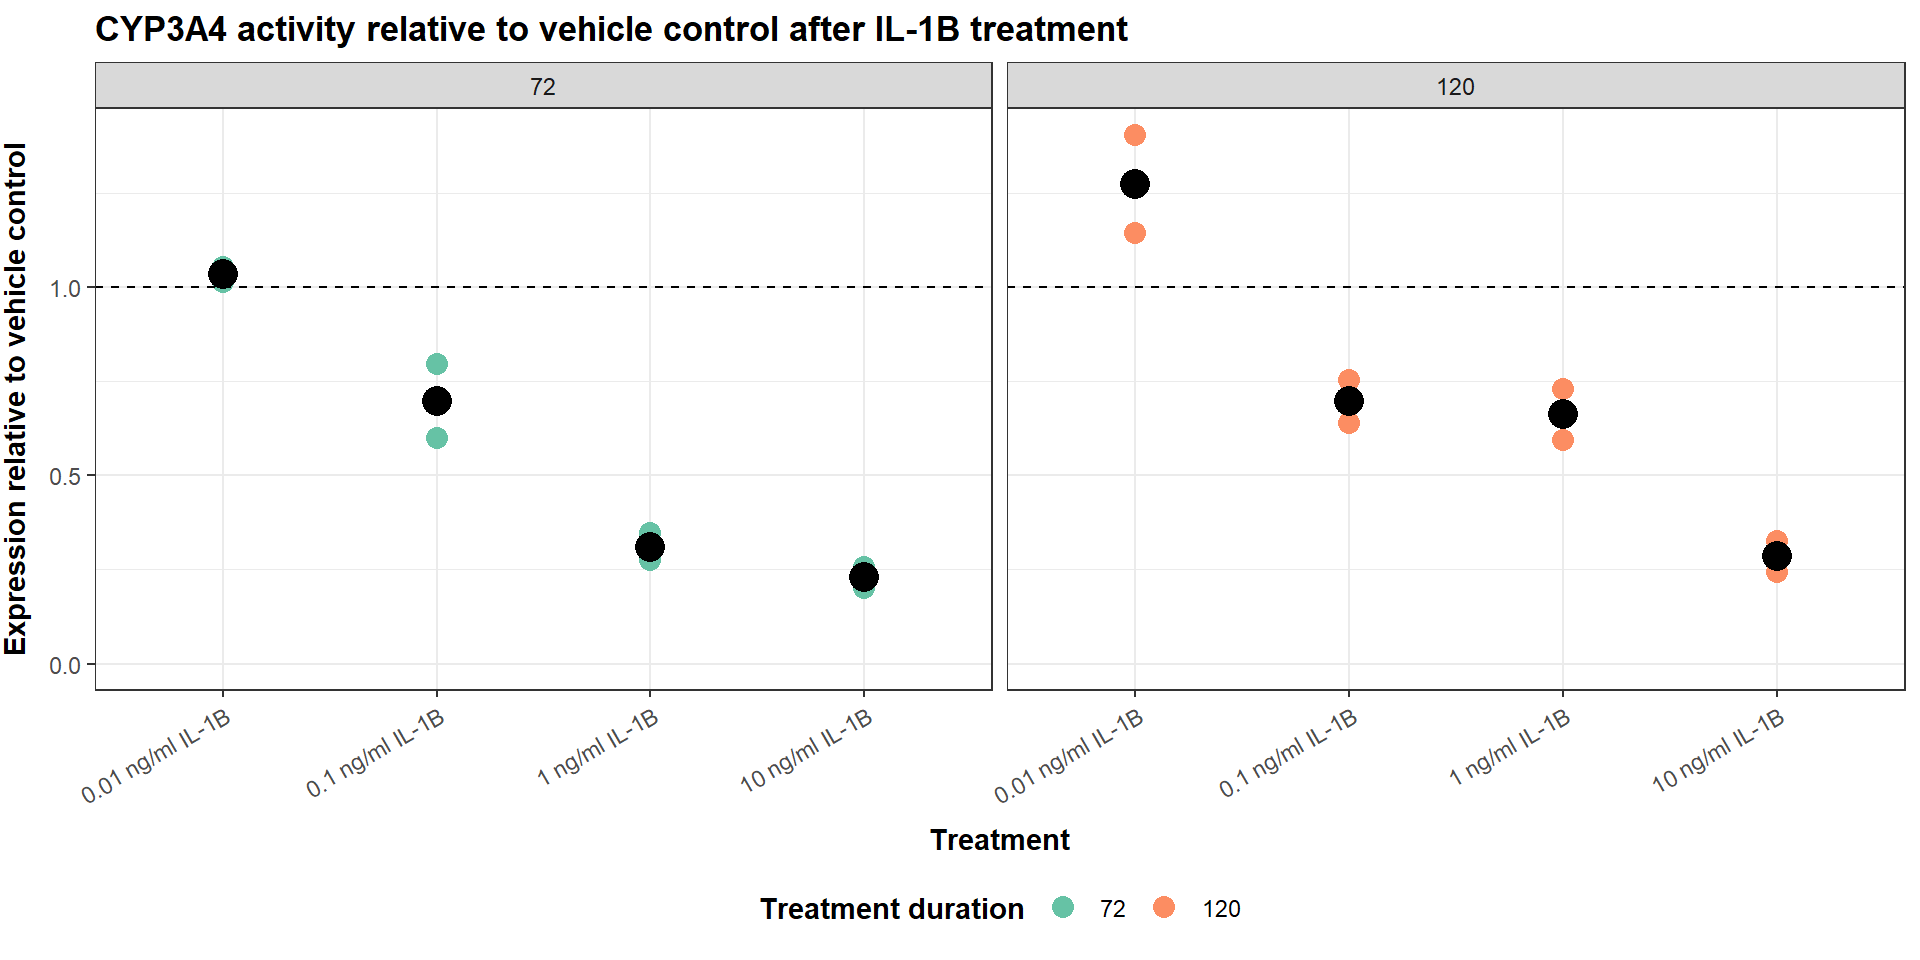

In [ ]:

plot_data_I1B <- data[time_incubation == 0.5 
                      & treatment %in% group_IL1B
                      & time_treatment != 24]


act_3A4_IL1B <- 
  ggplot(data = plot_data_I1B) +
    geom_point(
      mapping = aes(x = treatment, y = mean_relative_amount, color = factor(time_treatment)),
      size = 3.5
    ) +
    stat_summary(
      fun = "mean",
      geom = "point",
      mapping = aes(x = treatment, y = mean_relative_amount),
      size = 5
    ) +
    scale_color_brewer(palette = "Set2") +
    facet_wrap(facets = vars(time_treatment)) +
    labs(title = "CYP3A4 activity relative to vehicle control after IL-1B treatment",
         x = "Treatment",
         y = "Expression relative to vehicle control",
         color = "Treatment duration"
         ) + 
    scale_y_continuous(limits = c(0, NA)) +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 30, hjust = 1),
          axis.title.y = element_text(vjust = 3, face = "bold"),
          axis.title.x = element_text(vjust = -1.5, face ="bold"),
          plot.title = element_text(face = "bold"),
          legend.title = element_text(face = "bold"),
          legend.position = "bottom"
       ) +
    geom_hline(yintercept = 1, linetype = "dashed")

act_3A4_IL1B


### Timepoints combined

IL-6

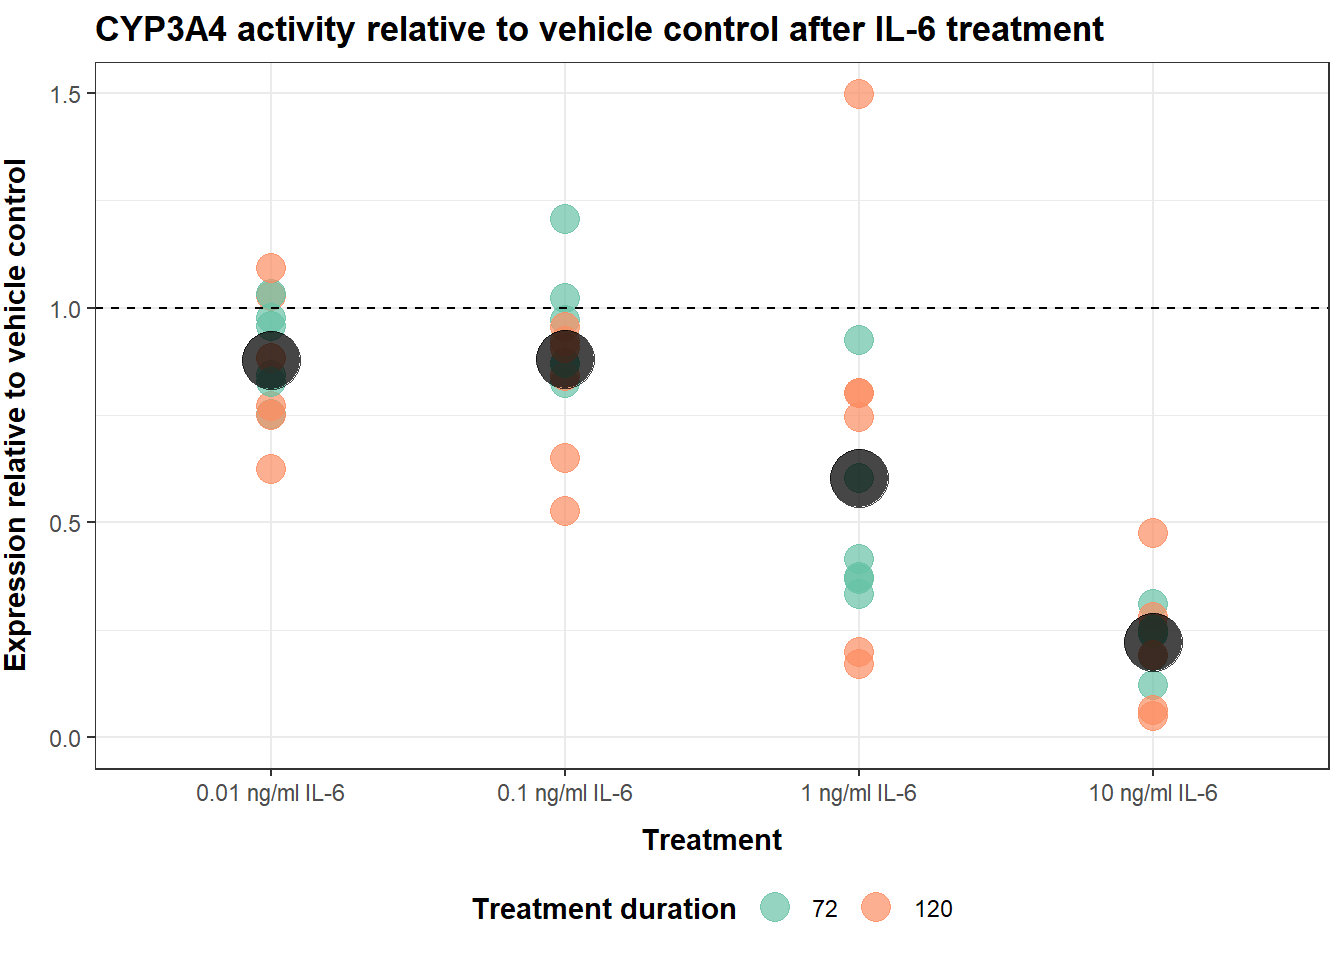

In [ ]:

IL6_combined_data <- 
  data[time_incubation == 0.5
       & treatment %in% group_IL6
       & time_treatment != 24]

IL6_combined_data[,
                  overall_mean := mean(mean_relative_amount),
                  by = .(treatment)]


ggplot(data = IL6_combined_data) +
  geom_point(aes(x = treatment,
                 y = relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 5,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = overall_mean),
             size = 10,
             alpha = 0.1
             ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-6 treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration"
       ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(#axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  scale_y_continuous(limits = c(0, NA))


IL-1B

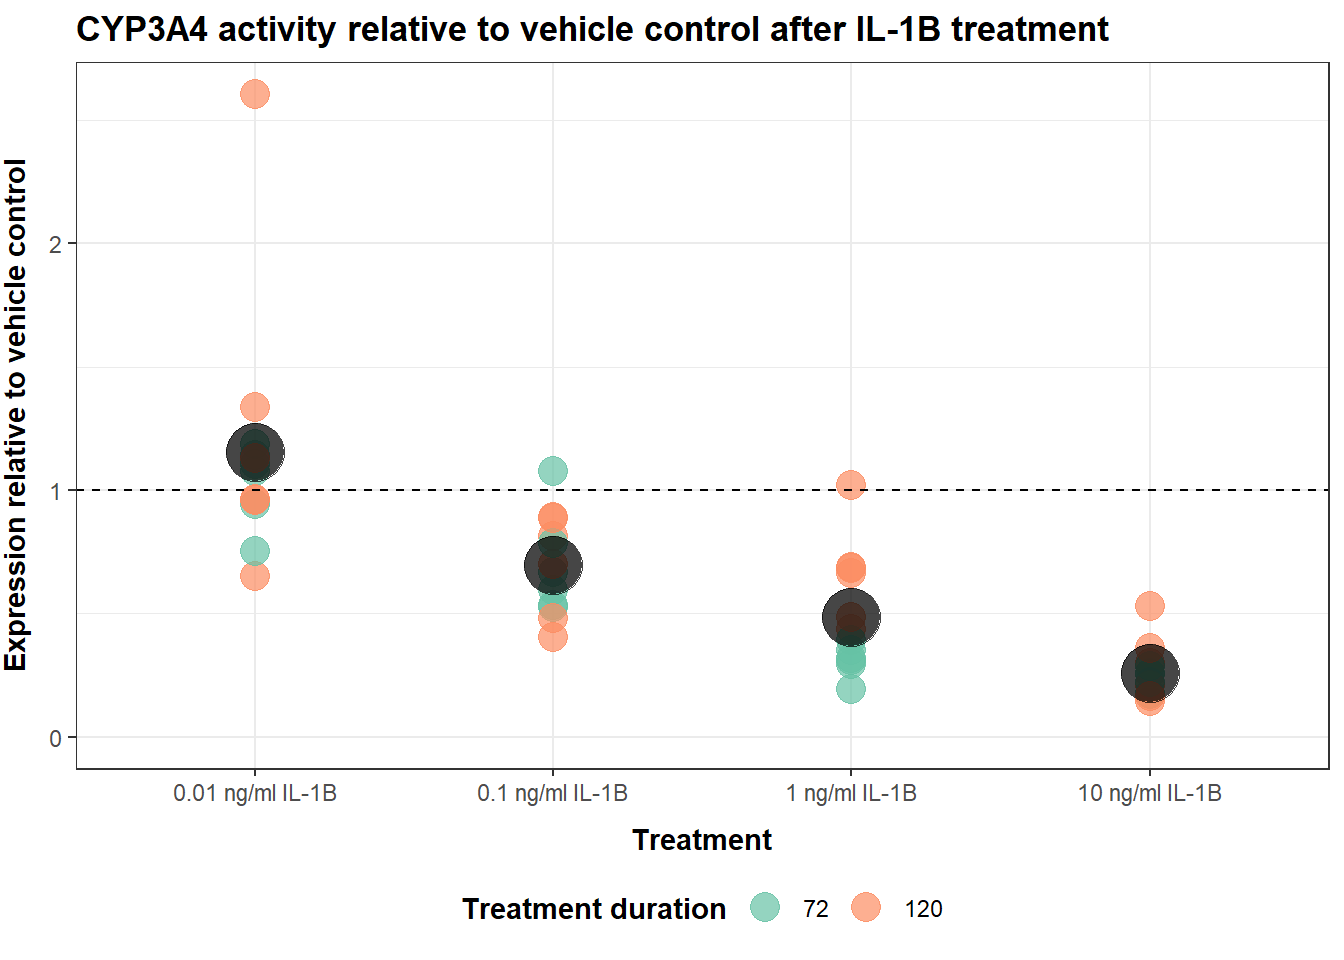

In [ ]:

IL1B_combined_data <- 
  data[time_incubation == 0.5
       & treatment %in% group_IL1B
       & time_treatment != 24]

IL1B_combined_data[,
                  overall_mean := mean(mean_relative_amount),
                  by = .(treatment)]


ggplot(data = IL1B_combined_data) +
  geom_point(aes(x = treatment,
                 y = relative_amount,
                 color = factor(time_treatment)
                 ),
             size = 5,
             alpha = 0.7
             ) +
  scale_color_brewer(palette = "Set2") +
  geom_point(aes(x = treatment,
                 y = overall_mean),
             size = 10,
             alpha = 0.1
             ) +
  labs(title = "CYP3A4 activity relative to vehicle control after IL-1B treatment",
       x = "Treatment",
       y = "Expression relative to vehicle control",
       color = "Treatment duration"
       ) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  theme_bw() +
  theme(#axis.text.x = element_text(angle = 30, hjust = 1),
        axis.title.y = element_text(vjust = 3, face = "bold"),
        axis.title.x = element_text(vjust = -1.5, face ="bold"),
        plot.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
        legend.position = "bottom"
     ) +
  scale_y_continuous(limits = c(0, NA))


## EC50